# Task 2 1

In [2]:
import pandas as pd
df = pd.read_csv("merged_dataset.csv")

In [3]:
df = df.loc[:, (df != 0).any(axis=0)]

In [4]:
data = df[df.columns[6:7]]

In [5]:
data

symptom:Adrenal crisis
0                  0.789491
1                  0.348112
2                 -1.000000
3                  1.158953
4                  0.242350
..                      ...
395               -0.376710
396               -0.290690
397               -0.526187
398               -0.414784
399               -0.204670

[400 rows x 1 columns]

In [6]:
len(df.columns[6:42])

36

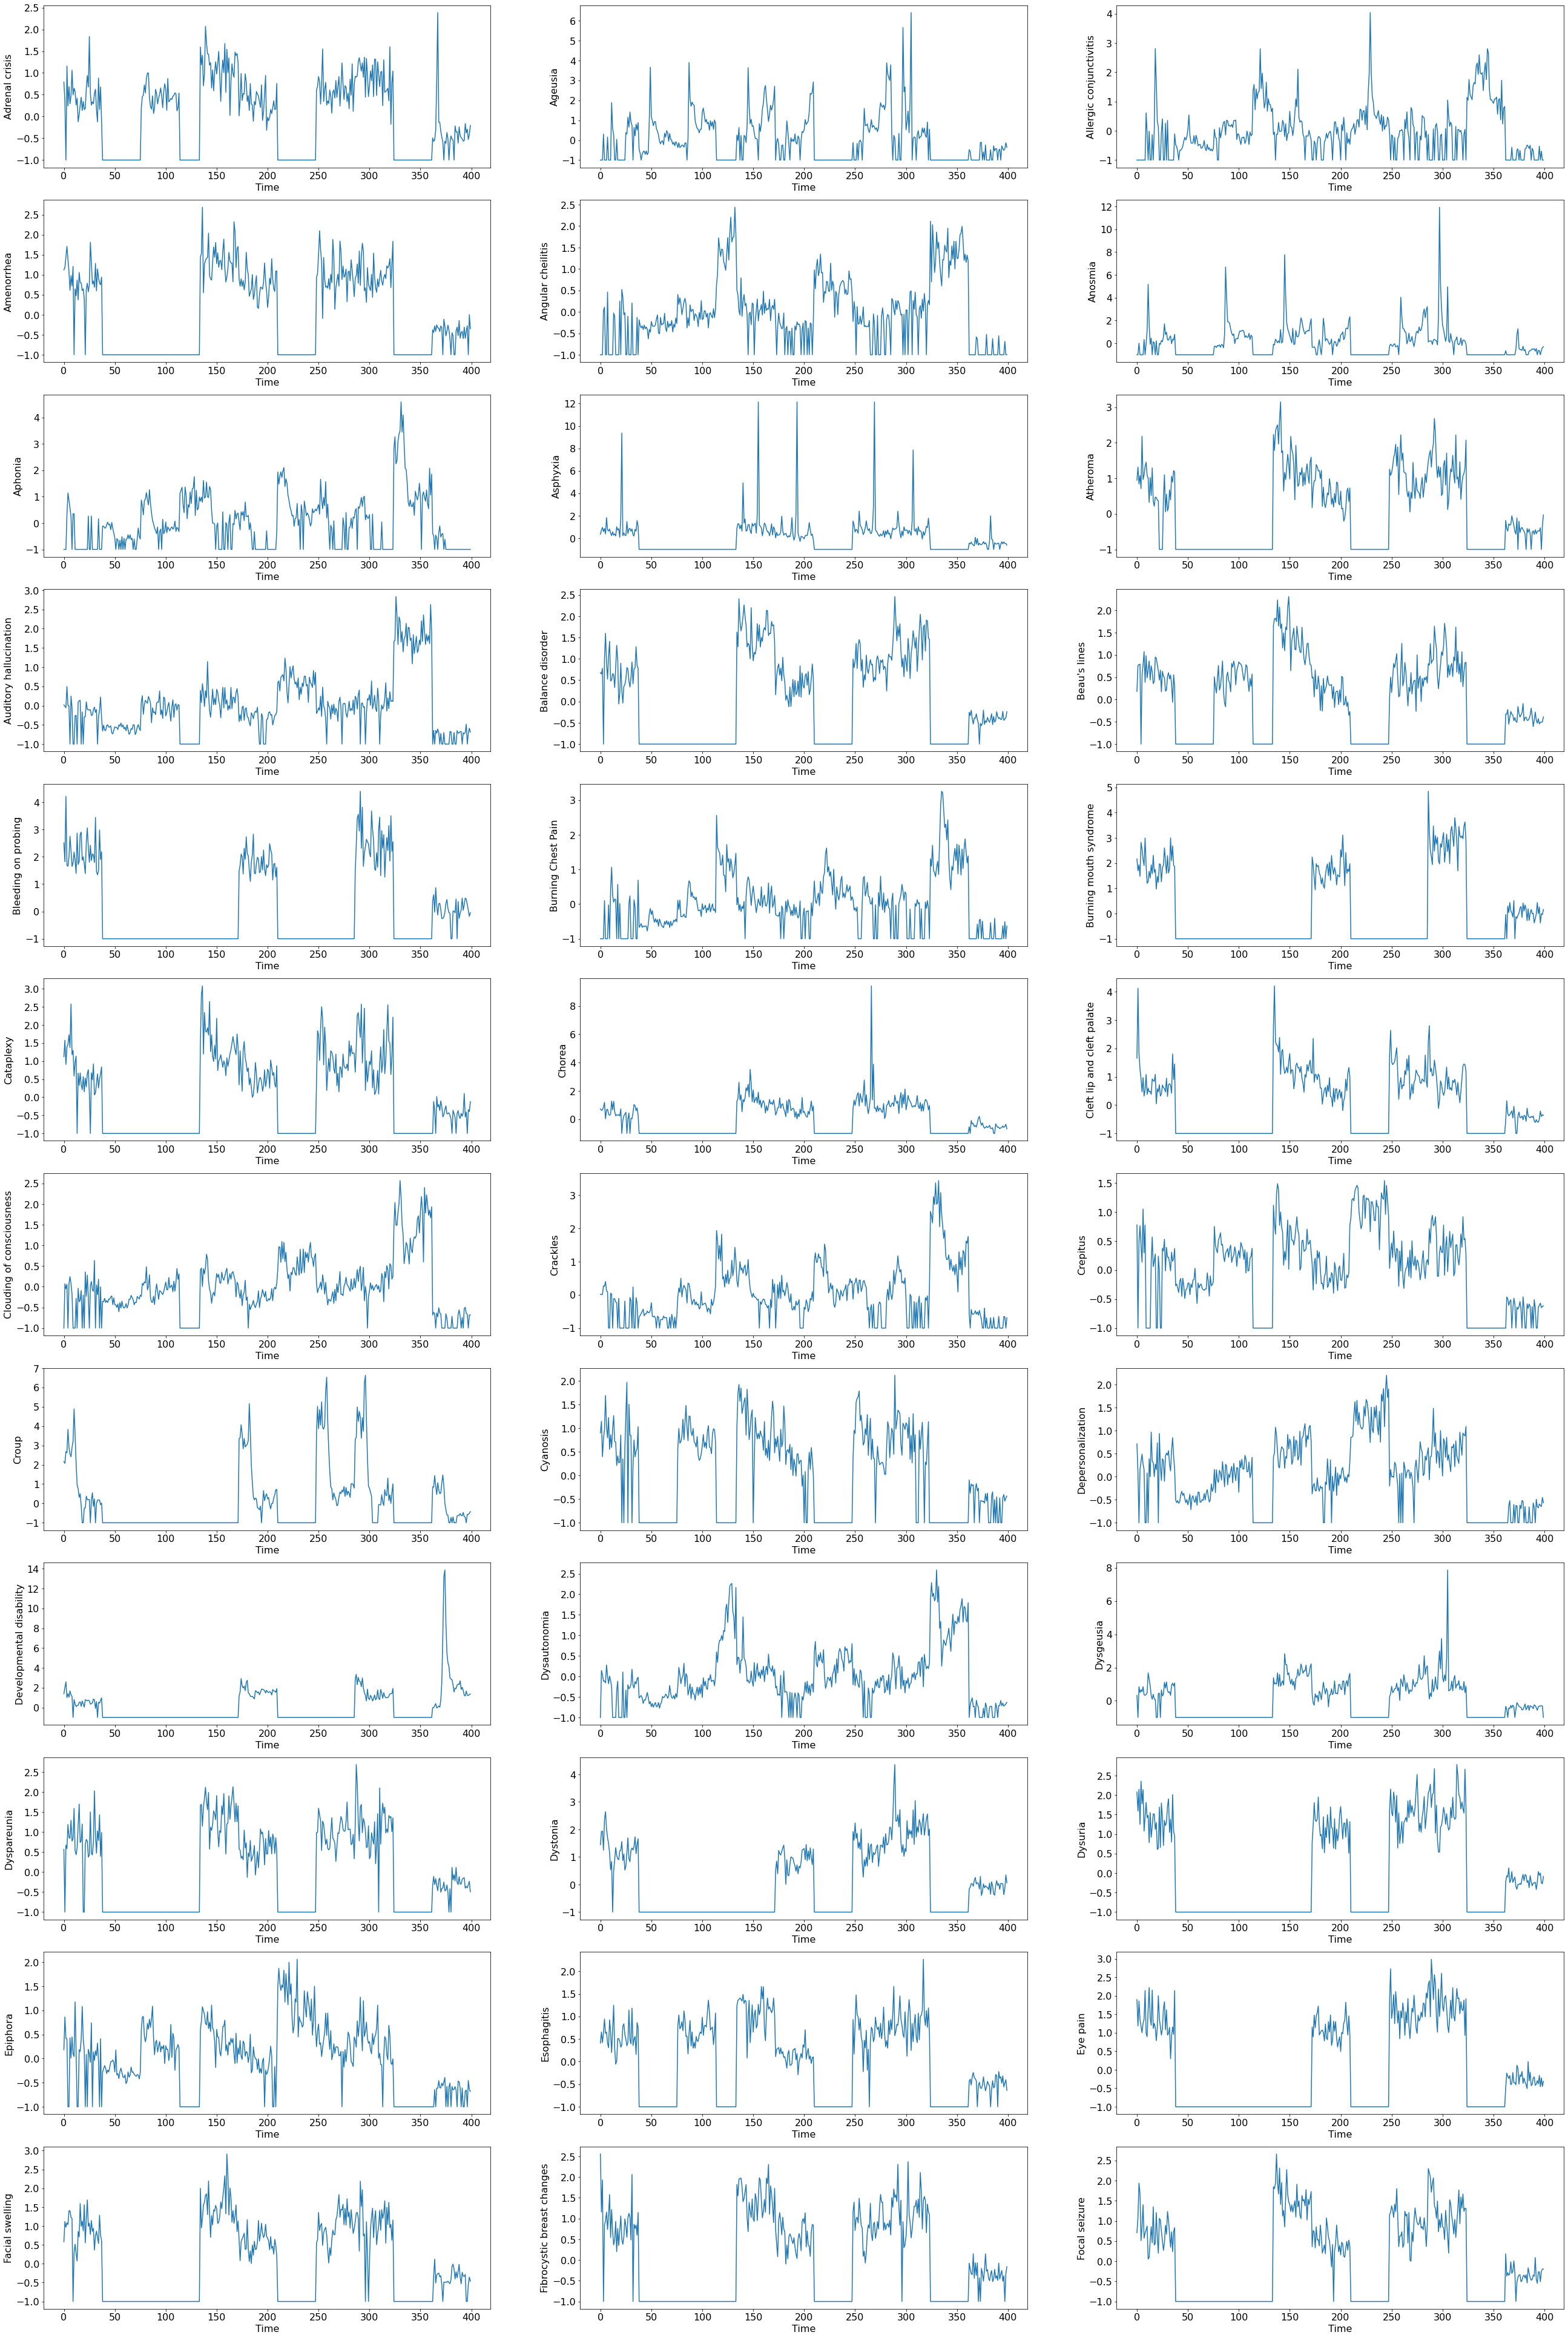

In [7]:
##distributions over time for 36 symptons
import matplotlib.pyplot as plt
plt.figure(figsize=(45,70))

for i in range(12):
    for j in range(3):
        plt.subplot2grid((12,3), (i, j))
        plt.plot(df[df.columns[6+3*i+j:6+3*i+j+1]])
        plt.ylabel(df.columns[6+3*i+j:6+3*i+j+1][0][8:],size=16)
        plt.xlabel('Time',size=16)
        plt.xticks(size=16)
        plt.yticks(size=16)
plt.show()

In [8]:
import plotly.graph_objects as go 
import pandas as pd 

In [9]:
region = df['open_covid_region_code']

In [10]:
region_drop = region.drop_duplicates()

In [11]:
import numpy as np
region_drop_ = []
for i in range(len(region_drop)):
    a = str(np.array(region_drop)[i])
    region_drop_.append(a[3:])

In [12]:
len(region_drop_)

11

In [13]:
## plot the map for the symptom Adrenal Crisis (col 6)with the sum of the intensity over January to September
# for i in range(3):
region_num = []
region_num = [0 for _ in range(len(region_drop_))]
#for k in range(len(region_drop_)):
#    region_num.append(0)

for k in range(len(region_drop_)):
    for j in range(len(df[df.columns[6:6+1]])):
        a = np.array(df)[j][1]
        b = np.array(df)[j][6]
        if region_drop_[k] == a[3:]:
            region_num[k] = region_num[k] + b
#     print(region_num)

num = region_num
fig = go.Figure(data=go.Choropleth( 
locations=region_drop_,# region code 
z = num, 
locationmode = 'USA-states', # country 
colorscale = 'Reds',# color scale
colorbar_title = 'Num', # color bar 
)) 

fig.update_layout( 
    title_text = str(df.columns[6:6+1][0]),# titles of the map ; col 6:the symptom Adrenal Crisis 
    geo_scope='usa', # set scope 
    #scope : "world"，"usa"，"europe"，"asia"，"africa"，"north america"，"south america" 
) 

In [14]:
## Example for Symptom Ageusia:col7
# for i in range(3):
region_num = [0 for _ in range(len(region_drop_))]

for k in range(len(region_drop_)):
    for j in range(len(df[df.columns[6+1:6+2]])):
        a = np.array(df)[j][1]
        b = np.array(df)[j][6+1]
        if region_drop_[k] == a[3:]:
            region_num[k] = region_num[k] + b
#     print(region_num)

num = region_num
fig = go.Figure(data=go.Choropleth( 
locations=region_drop_,  
z = num, 
locationmode = 'USA-states',  
colorscale = 'Reds',
colorbar_title = 'Num',
)) 

fig.update_layout( 
    title_text = str(df.columns[6+1:6+2][0]), 
    geo_scope='usa',  
) 

# Task 2 2

In [15]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=2)
X=df.loc[:,'symptom:Adrenal crisis':'symptom:Viral pneumonia']
pca_data = estimator.fit_transform(X)

In [16]:
X

symptom:Adrenal crisis  symptom:Ageusia  symptom:Allergic conjunctivitis  \
0                  0.789491        -1.000000                        -1.000000   
1                  0.348112        -1.000000                        -1.000000   
2                 -1.000000        -1.000000                        -1.000000   
3                  1.158953         0.302886                        -1.000000   
4                  0.242350        -1.000000                        -1.000000   
..                      ...              ...                              ...   
395               -0.376710        -0.422684                        -0.525232   
396               -0.290690        -0.513380                        -1.000000   
397               -0.526187        -0.433149                        -0.694594   
398               -0.414784        -0.133153                        -1.000000   
399               -0.204670        -0.359894                        -1.000000   

     symptom:Amenorrhea  symptom:Angular cheilitis  symptom:Anosmia  \
0              1.123680                  -1.000000        -1.000000   
1              1.180703                  -1.000000        -1.000000   
2              1.448539                  -1.000000         0.004888   
3              1.707735                   0.028579        -1.000000   
4              1.396700                   0.109818        -1.000000   
..                  ...                        ...              ...   
395           -0.409033                  -1.000000        -0.638186   
396           -0.275979                  -1.000000        -1.000000   
397           -1.000000                  -0.690187        -0.631359   
398            0.000497                  -1.000000        -0.373310   
399           -0.348554                  -1.000000        -0.305044   

     symptom:Aphonia  symptom:Asphyxia  symptom:Atheroma  \
0          -1.000000          0.354205          0.947386   
1          -1.000000          0.733802          1.315810   
2          -1.000000          0.957095          0.840367   
3           0.304387          0.580124          1.077211   
4           1.141581          0.870405          0.710541   
..               ...               ...               ...   
395        -1.000000         -0.507443         -0.485960   
396        -1.000000         -0.332749         -0.392977   
397        -1.000000         -0.471978         -1.000000   
398        -1.000000         -0.469351         -0.349117   
399        -1.000000         -0.619089         -0.029816   

     symptom:Auditory hallucination  ...  symptom:Subdural hematoma  \
0                          0.017841  ...                   0.616969   
1                         -0.017533  ...                   1.246788   
2                         -0.055188  ...                   0.501122   
3                          0.497093  ...                   0.457067   
4                          0.005289  ...                   0.926983   
..                              ...  ...                        ...   
395                       -0.483092  ...                  -0.539874   
396                       -1.000000  ...                  -0.534979   
397                       -0.723859  ...                  -0.146645   
398                       -0.588071  ...                  -0.474607   
399                       -0.687345  ...                  -0.295125   

     symptom:Tachypnea  symptom:Tenderness  symptom:Thyroid nodule  \
0             0.285116            1.334010                2.137488   
1             0.735636            1.188543                1.421365   
2             0.998169            1.105186                2.493571   
3             0.623816            1.173833                1.524233   
4             1.946205            0.930298                2.299703   
..                 ...                 ...                     ...   
395          -1.000000           -0.349485               -0.234421   
396          -0.555962           -0.498220   

In [17]:
pca_data.shape

(400, 2)

In [18]:
pca_data

array([[  9.88478842,  -5.07538377],
       [  9.18316191,  -3.61977458],
       [ 11.78541359,  -5.17260305],
       [  9.87221947,  -4.34198675],
       [ 11.49012304,  -4.54999127],
       [ 10.94643685,  -4.6077848 ],
       [ 11.51846551,  -4.53793938],
       [ 10.439682  ,  -3.7689565 ],
       [ 10.57427641,  -4.88066031],
       [ 10.16040821,  -4.793845  ],
       [  8.73696625,  -7.91701413],
       [  9.25671822,  -4.03919984],
       [  6.88049357,  -3.06839191],
       [  6.86776884,  -3.39687765],
       [  7.22393009,  -3.67227879],
       [  7.25633853,  -3.19800033],
       [  8.00026186,  -2.76417381],
       [  7.27083715,  -2.67497209],
       [  6.59649787,  -3.15593448],
       [  5.44826957,  -3.12646456],
       [  5.89390927,  -2.70579606],
       [  7.56347739,  -3.24827633],
       [  7.38115522,  -3.18542636],
       [  7.1865538 ,  -2.60541338],
       [  7.74308189,  -3.02075106],
       [  7.74367635,  -2.01535419],
       [  7.8030087 ,  -3.09588468],
 

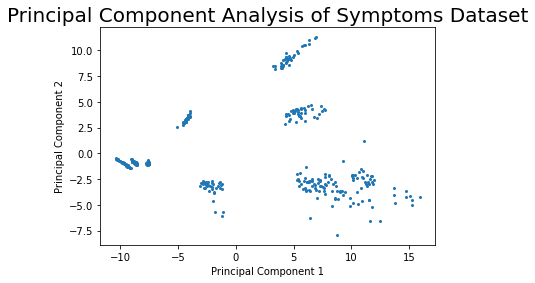

In [19]:
plt.scatter(pca_data[:,0], pca_data[:,1],s=4)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Principal Component Analysis of Symptoms Dataset",fontsize=20)
plt.show()

# Task 2 3

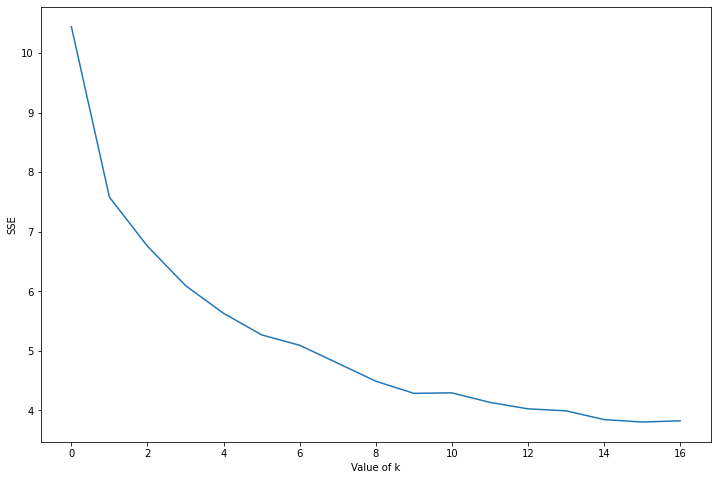

In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
a=[]
for k in range(1,18):
    model = KMeans(n_clusters=k, init='k-means++', n_init=5)
    model.fit(X)
    value = sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'),axis=1))/X.shape[0]
    a.append(value)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(a)
plt.xlabel('Value of k')
plt.ylabel('SSE')
plt.show()
# model = KMeans(n_clusters=4, init='k-means++', n_init=5)
# y_pred = model.fit_predict(df.iloc[:,6:])

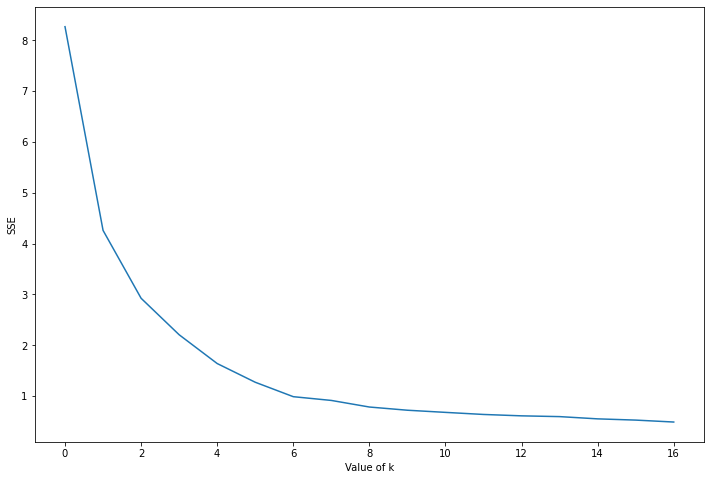

In [21]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
a=[]
for k in range(1,18):
    model = KMeans(n_clusters=k, init='k-means++', n_init=5)
    model.fit(pca_data)
    value = sum(np.min(cdist(pca_data, model.cluster_centers_, 'euclidean'),axis=1))/pca_data.shape[0]
    a.append(value)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(a)
plt.xlabel('Value of k')
plt.ylabel('SSE')
plt.show()
# model = KMeans(n_clusters=4, init='k-means++', n_init=5)
# y_pred = model.fit_predict(df.iloc[:,6:])

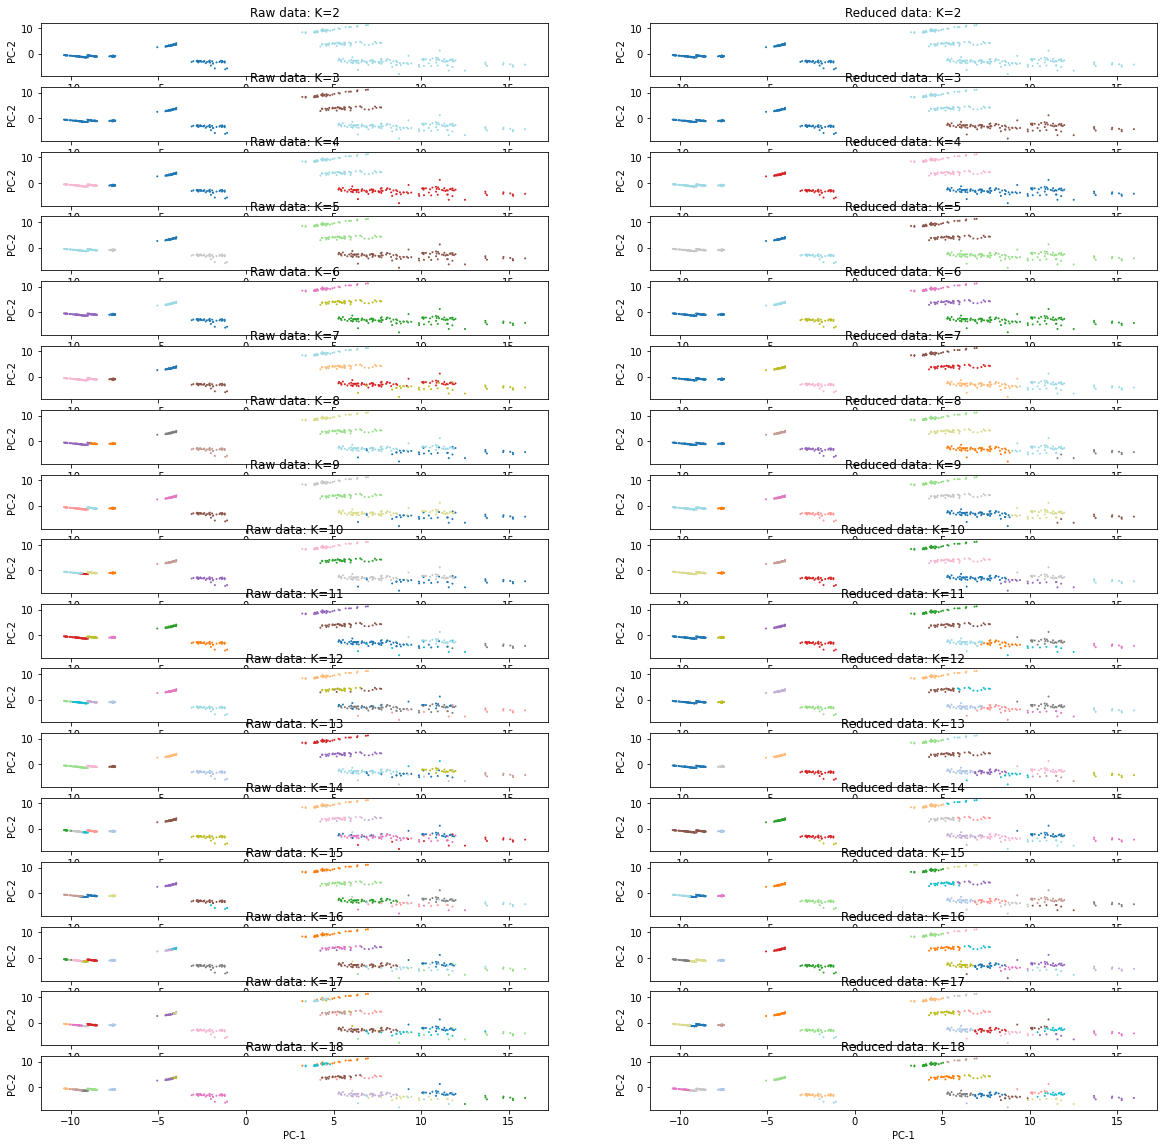

In [22]:
k_val = list(range(2,19,1))
fig,a=plt.subplots(17,2,figsize=(20,20))
for i,k in enumerate(k_val):
    km_raw=KMeans(n_clusters=k,random_state=0)
    km_raw.fit(X)
    y_pred_raw=km_raw.predict(X)
    
    a[i][0].scatter(pca_data[:,0],pca_data[:,1],c=y_pred_raw,cmap=plt.cm.get_cmap('tab20'),s=1)
    a[i][0].set_title('Raw data: '+f'K={k}')
    a[i][0].set_xlabel("PC-1")
    a[i][0].set_ylabel("PC-2")
    
    km_raw=KMeans(n_clusters=k,random_state=0)
    km_raw.fit(pca_data)
    y_pred_raw=km_raw.predict(pca_data)
    
    a[i][1].scatter(pca_data[:,0],pca_data[:,1],c=y_pred_raw,cmap=plt.cm.get_cmap('tab20'),s=1)
    a[i][1].set_title('Reduced data: '+f'K={k}')
    a[i][1].set_xlabel("PC-1")
    a[i][1].set_ylabel("PC-2")

In [21]:
###3######
import numpy as np 
import pandas as pd 

df = pd.read_csv('merged_dataset.csv')

df = df.sample(frac = 1) 

X = df.drop(columns=['Unnamed: 0','open_covid_region_code','country_region_code',
                    'country_region_code','country_region','sub_region_1','date','hospitalized_new'])


y = df['hospitalized_new'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train,y_train)

tree_regressor.score(X_test, y_test)

0.030250250808246504

In [22]:
#######3###########
import numpy as np 
import pandas as pd 

df = pd.read_csv('merged_dataset.csv')
df = df.sample(frac = 1) 

X = df.drop(columns=['Unnamed: 0','open_covid_region_code','country_region_code',
                    'country_region_code','country_region','sub_region_1','date','hospitalized_new'])

y = df['hospitalized_new'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#train the model
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train,y_train)

#test the model
knn_regressor.score(X_test, y_test)

0.23652920495559582